In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import numpy as np
import seaborn as sns

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/mid_sem_exam_data.csv")

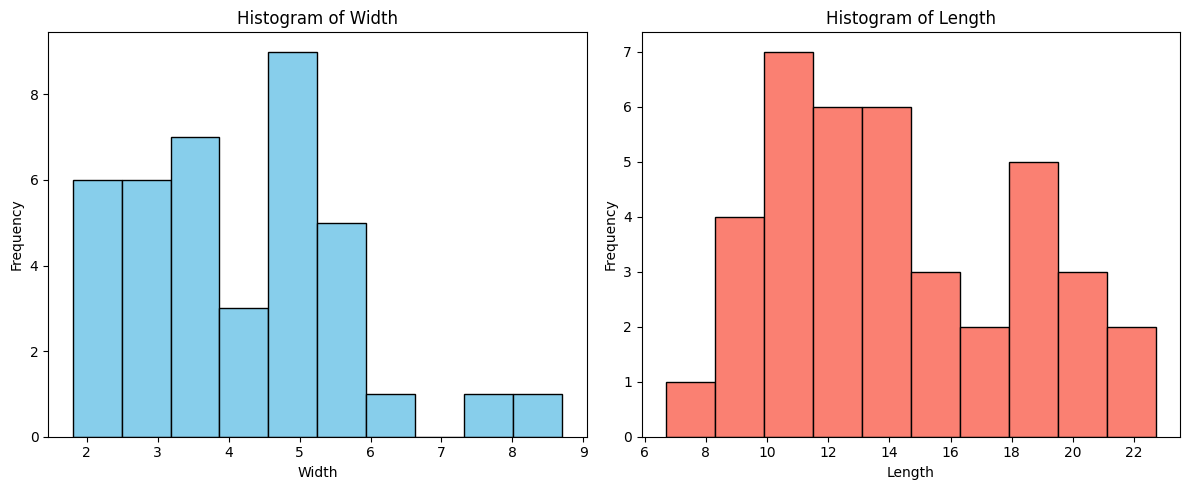

In [27]:


# 1. Histograms of Length and Width
plt.figure(figsize=(12, 5))

# Histogram for Width
plt.subplot(1, 2, 1)
plt.hist(data['width'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Width')
plt.xlabel('Width')
plt.ylabel('Frequency')

# Histogram for Length
plt.subplot(1, 2, 2)
plt.hist(data['Length'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


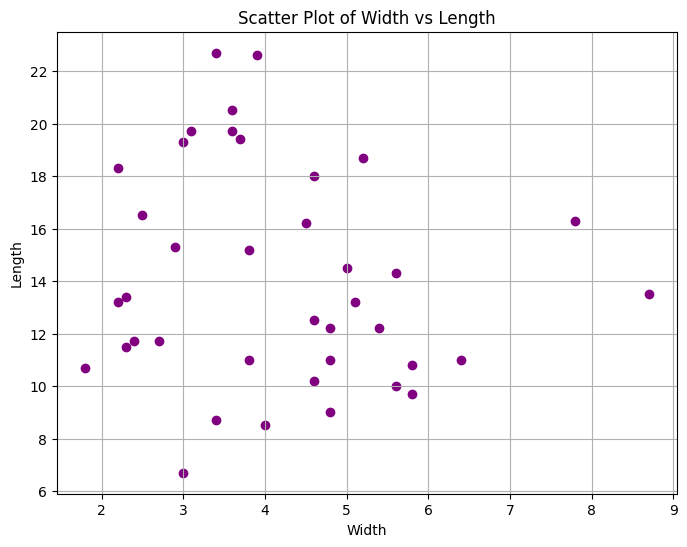

In [28]:
# 2. Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['width'], data['Length'], color='purple')
plt.title('Scatter Plot of Width vs Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.grid(True)
plt.show()

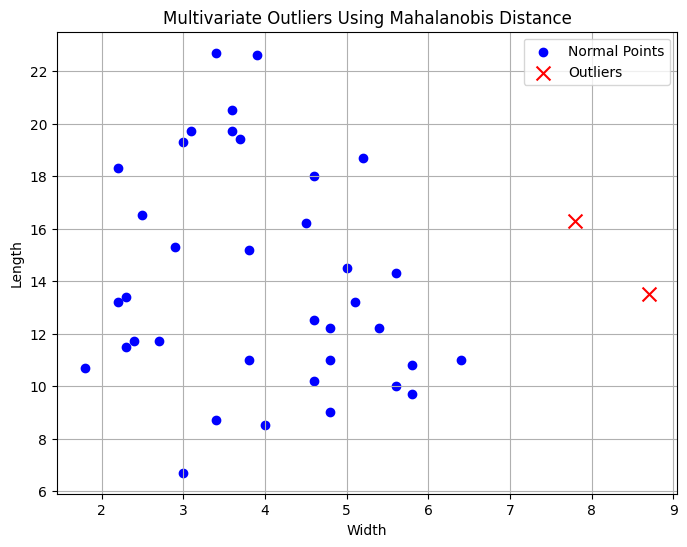

In [29]:
from scipy.spatial import distance

mean_vector = data[['width', 'Length']].mean().values
cov_matrix = np.cov(data[['width', 'Length']].values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahalanobis_distances = data[['width', 'Length']].apply(
    lambda row: distance.mahalanobis(row, mean_vector, inv_cov_matrix), axis=1
)

threshold = np.percentile(mahalanobis_distances, 95)
outliers = mahalanobis_distances > threshold

plt.figure(figsize=(8, 6))
plt.scatter(data.loc[~outliers, 'width'], data.loc[~outliers, 'Length'], color='blue', label='Normal Points')
plt.scatter(data.loc[outliers, 'width'], data.loc[outliers, 'Length'], color='red', marker='x', s=100, label='Outliers')

plt.title('Multivariate Outliers Using Mahalanobis Distance')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.grid(True)
plt.show()


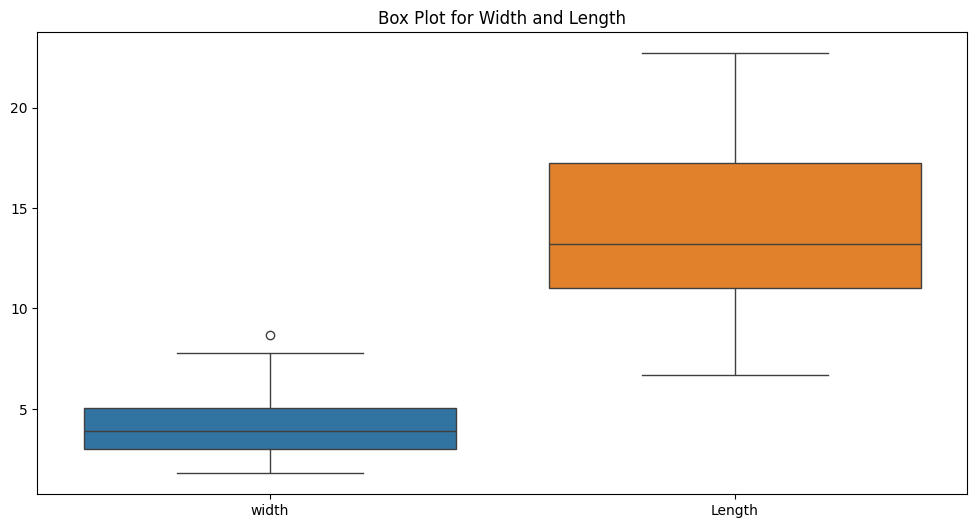

In [30]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['width', 'Length']])
plt.title('Box Plot for Width and Length')
plt.show()

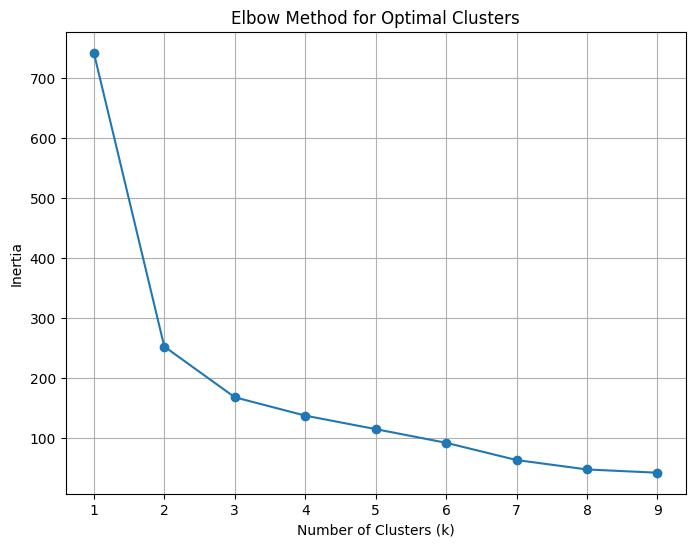

In [31]:
# Elbow Method to Find Optimal Number of Clusters
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['width', 'Length']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


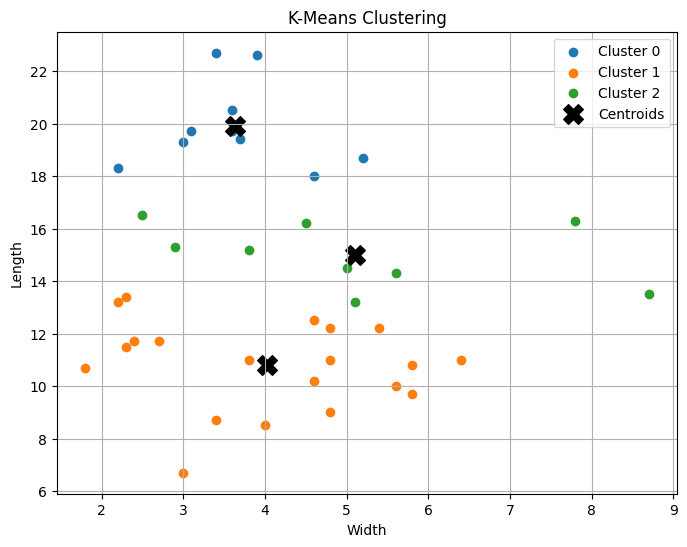

In [32]:

# 3. Apply Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['width', 'Length']])

# Visualize Clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['width'], cluster_data['Length'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.grid(True)
plt.show()


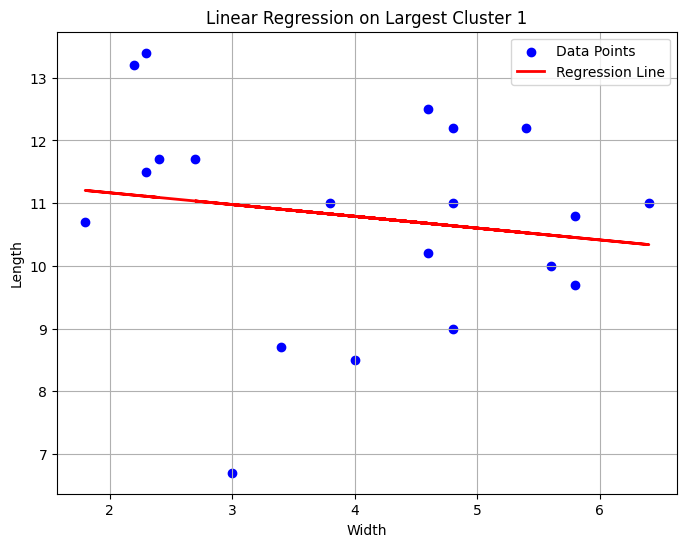

In [33]:

# 4. Apply Regression on the Largest Cluster
largest_cluster = data['Cluster'].value_counts().idxmax()
largest_cluster_data = data[data['Cluster'] == largest_cluster]

X = largest_cluster_data[['width']]
y = largest_cluster_data['Length']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Plot regression
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title(f'Linear Regression on Largest Cluster {largest_cluster}')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   Width  Length  Predicted Length (Largest Cluster)  Predicted Cluster
0      3      19                           10.977694                  0
1      5      13                           10.601706                  2
2      8      16                           10.037724                  2
3      6       9                           10.413712                  1
4      2      11                           11.165688                  1


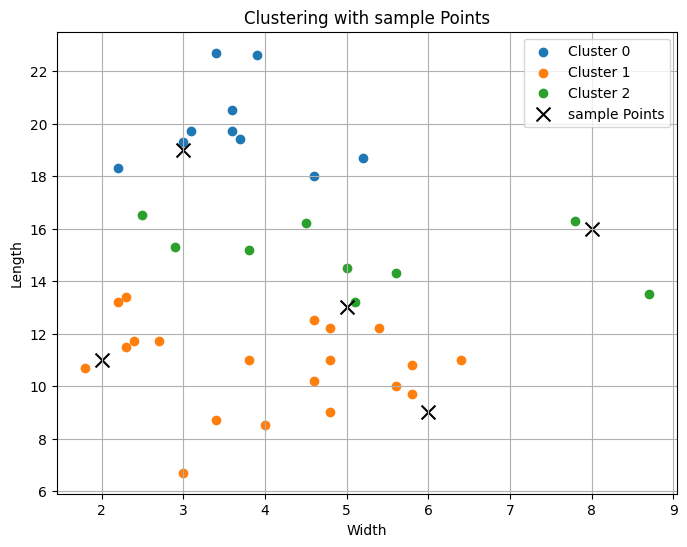

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


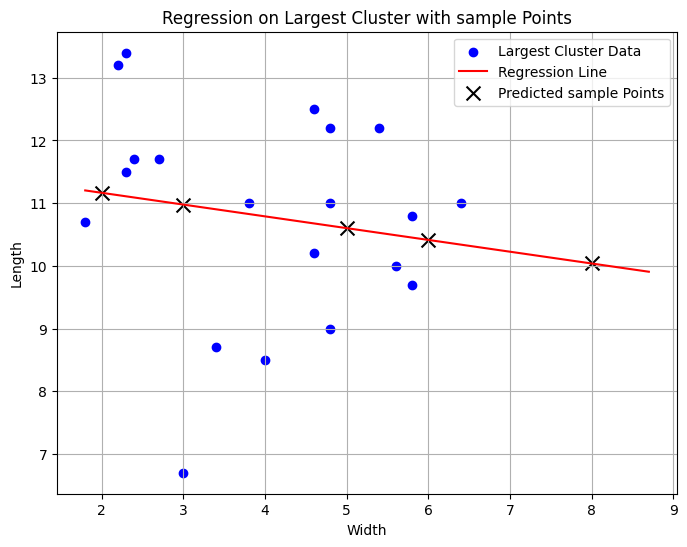

In [34]:
# 5. Classify sample points
# method 1: clustering
# method 2: regression
sample_points = np.array([[3, 19], [5, 13], [8, 16], [6, 9], [2, 11]])

sample_clusters = kmeans.predict(sample_points)

sample_widths = sample_points[:, 0].reshape(-1, 1)
predicted_lengths = reg.predict(sample_widths)

sample_classification = pd.DataFrame({
    'Width': sample_points[:, 0],
    'Length': sample_points[:, 1],
    'Predicted Length (Largest Cluster)': predicted_lengths,
    'Predicted Cluster': sample_clusters
})

print(sample_classification)

import matplotlib.pyplot as plt

# Scatter plot for clustering
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(cluster_points['width'], cluster_points['Length'], label=f'Cluster {cluster}')

# Plot sample points
plt.scatter(sample_classification['Width'], sample_classification['Length'],
            c='black', marker='x', s=100, label='sample Points')

plt.title('Clustering with sample Points')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.grid(True)
plt.show()

# Regression Line on Largest Cluster
plt.figure(figsize=(8, 6))
plt.scatter(largest_cluster_data['width'], largest_cluster_data['Length'], label='Largest Cluster Data', color='blue')

# Regression line
x_vals = np.linspace(data['width'].min(), data['width'].max(), 100).reshape(-1, 1)
y_vals = reg.predict(x_vals)
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Plot sample points with predicted lengths
plt.scatter(sample_classification['Width'], sample_classification['Predicted Length (Largest Cluster)'],
            color='black', marker='x', s=100, label='Predicted sample Points')

plt.title('Regression on Largest Cluster with sample Points')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.grid(True)
plt.show()
